In [ ]:
#1 BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn import metrics

In [ ]:
#2 IMPORTANDO ARQUIVO
dados=pd.read_csv('insurance.csv')

In [ ]:
#3 ANALISANDO OS DADOS I (ANÁLISE EXPLORATÓRIA DOS DADOS - AED)
print(dados.head())
print(dados.shape)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1338, 7)


In [ ]:
#4 ANALISANDO OS DADOS II - AED
print(dados.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
#5 ANALISANDO OS DADOS III - AED
dados.describe().round(2)


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [ ]:
#6 PRÉ PROCESSSANDO OS DADOS I
#Convertendo as variáveis SEX, SMOKER e REGION em numéricas (ENCODING)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#sex
le.fit(dados.sex)
dados.sex = le.transform(dados.sex)

# smoker
le.fit(dados.smoker)
dados.smoker = le.transform(dados.smoker)

#region
le.fit(dados.region)
dados.region = le.transform(dados.region)

print(dados.head())
print(dados.shape)

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
(1338, 7)


In [ ]:
#7 ANALISANDO OS DADOS IV - AED
#CORRELAÇÕES
dados.corr().round(2)

,age,sex,bmi,children,smoker,region,charges
age,1.00,-0.02,0.11,0.04,-0.03,0.00,0.30
sex,-0.02,1.00,0.05,0.02,0.08,0.00,0.06
bmi,0.11,0.05,1.00,0.01,0.00,0.16,0.20
children,0.04,0.02,0.01,1.00,0.01,0.02,0.07
smoker,-0.03,0.08,0.00,0.01,1.00,-0.00,0.79
region,0.00,0.00,0.16,0.02,-0.00,1.00,-0.01
charges,0.30,0.06,0.20,0.07,0.79,-0.01,1.00


In [ ]:
#8 FILTRANDO DADOS I
#FILTRO PARA SEPARAR SOMENTE OS FUMANTES
dados = dados[dados['smoker'] == 1]
print(dados.head())
print(dados.shape)

    age  sex    bmi  children  smoker  region     charges
0    19    0  27.90         0       1       3  16884.9240
11   62    0  26.29         0       1       2  27808.7251
14   27    1  42.13         0       1       2  39611.7577
19   30    1  35.30         0       1       3  36837.4670
23   34    0  31.92         1       1       0  37701.8768
(274, 7)


In [ ]:
#9 FILTRANDO DADOS II
#FILTRO PARA SEPARAR SOMENTE AS II - MULHERES
dados = dados[dados['sex'] == 1]
print(dados.head())
print(dados.shape)

    age  sex    bmi  children  smoker  region      charges
14   27    1  42.13         0       1       2  39611.75770
19   30    1  35.30         0       1       3  36837.46700
29   31    1  36.30         2       1       3  38711.00000
30   22    1  35.60         0       1       3  35585.57600
34   28    1  36.40         1       1       3  51194.55914
(159, 7)


In [ ]:
#10 ESCOLHA DAS VARIÁVEIS : IMC X GASTO COM SEGURO
X = dados['bmi'].values
Y = dados['charges'].values

In [ ]:
print(X)

[42.13  35.3   36.3   35.6   36.4   36.67  39.9   35.2   28.    34.43
 36.955 31.68  23.98  37.62  22.895 29.83  19.95  19.3   28.025 35.09
 31.35  25.3   28.69  30.495 24.42  25.175 35.53  41.895 27.74  34.8
 24.64  29.07  17.29  34.21  31.825 33.63  31.92  24.32  36.955 42.35
 19.8   34.2   40.565 45.54  27.7   25.41  34.39  35.97  30.8   36.48
 27.36  32.3   32.9   40.15  30.685 33.88  35.86  32.775 26.695 30.
 25.1   28.31  28.5   25.7   34.4   23.21  30.25  28.3   26.07  42.13
 25.84  40.565 37.8   25.6   34.1   33.535 26.41  28.31  38.06  32.015
 31.35  35.3   31.13  35.75  24.42  31.73  35.5   29.15  34.105 38.17
 27.1   24.4   20.9   28.5   24.795 31.79  28.025 30.78  24.13  28.93
 28.975 38.94  40.92  31.73  22.895 34.2   29.7   42.9   30.2   27.835
 30.8   34.96  24.795 22.895 25.9   22.99  32.7   28.215 20.13  36.08
 26.03  21.565 37.07  30.685 52.58  30.9   29.8   41.14  37.07  31.68
 36.19  38.39  33.33  35.75  32.8   44.88  27.36  29.81  35.625 33.4
 34.485 41.8   36.96  

In [ ]:
print(Y)

[39611.7577  36837.467   38711.      35585.576   51194.55914 39774.2763
 48173.361   38709.176   23568.272   37742.5757  47496.49445 34303.1672
 17663.1442  37165.1638  21098.55405 30184.9367  22412.6485  15820.699
 17560.37975 47055.5321  39556.4945  18972.495   20745.9891  40720.55105
 21223.6758  15518.18025 36950.2567  43753.33705 20984.0936  34779.615
 19515.5416  17352.6803  12829.4551  44260.7499  41097.16175 43921.1837
 33750.2918  24869.8368  36219.40545 46151.1245  17179.522   42856.838
 48549.17835 42112.2356  16297.846   21978.6769  38746.3551  42124.5153
 35491.64    42760.5022  24393.6224  41919.097   36085.219   38126.2465
 42303.69215 46889.2612  46599.1084  39125.33225 26109.32905 22144.032
 25382.297   28868.6639  35147.52848 17942.106   36197.699   22218.1149
 32548.3405  21082.16    38245.59327 48675.5177  23807.2406  45702.02235
 39241.442   23306.547   40182.246   34617.84065 20149.3229  32787.45859
 42560.4304  45710.20785 46130.5265  40103.89    34806.4677  4027

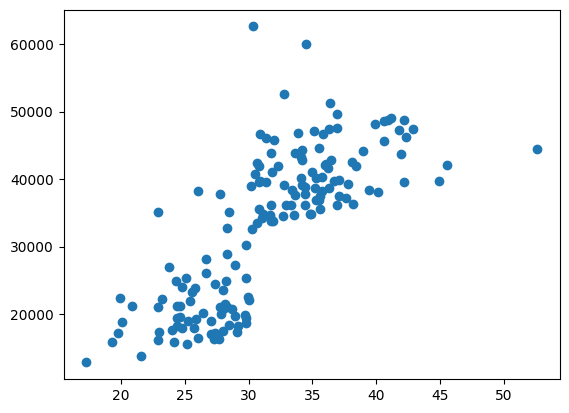

In [ ]:
#11 ANÁLISE GRÁFICA - AED
#Gráfico da relação entre IMC x Custo
plt.scatter(X, Y)
plt.show()


In [ ]:
#12 PEARSON
#Calculo do r (Pearson)
r = pearsonr(X, Y)
print(f'Coeficiente de correlação: {r}')

Coeficiente de correlação: PearsonRResult(statistic=0.7693553500239402, pvalue=2.290057897722594e-32)


In [ ]:
#13 MLS I
#Separar os conjuntos TREINAMENTO e TESTE (70% / 30%)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
#Dados de x (Features)
print(x_train)

[26.07  23.98  29.8   41.14  28.31  24.4   34.9   42.13  34.21  35.3
 52.58  35.75  35.09  36.955 36.08  35.6   34.2   30.2   17.29  27.835
 37.07  31.73  25.9   32.775 32.3   24.42  35.2   34.1   32.9   30.36
 24.605 19.95  39.9   24.42  31.825 29.7   25.6   27.06  31.79  36.4
 41.895 30.685 33.63  19.3   38.06  29.83  27.3   36.96  42.35  32.8
 31.68  28.93  20.9   28.    24.795 29.81  33.88  30.8   24.13  40.565
 27.7   38.17  28.215 40.565 35.75  30.9   28.5   31.13  35.86  34.105
 27.1   26.41  28.3   30.875 28.31  24.32  28.69  39.4   29.07  25.84
 33.4   22.895 29.83  35.53  32.015 27.36  38.39  45.54  30.78  34.2
 25.41  37.8   42.9   28.12  31.35  24.64  30.495 34.4   34.8   19.8
 37.07  31.065 30.    28.025 31.68  31.92  30.8   25.3   20.13  33.535
 21.565]


In [ ]:
print(x_test)

[31.73  36.955 25.1   29.15  38.94  29.925 33.63  30.685 23.76  30.25
 41.8   28.975 25.175 36.3   32.7   34.96  40.15  25.7   28.5   44.88
 35.625 27.8   37.62  35.3   34.39  23.21  22.895 24.795 31.35  35.5
 35.97  22.99  26.695 27.36  40.92  22.895 36.19  34.485 27.74  34.43
 36.3   28.025 36.48  36.67  26.695 33.33  42.13  26.03 ]


In [ ]:
#Dados de y (Target)
print(y_train)

[38245.59327 17663.1442  25309.489   48970.2476  32787.45859 18259.216
 34828.654   48675.5177  44260.7499  40103.89    44501.3982  40273.6455
 47055.5321  47496.49445 42211.1382  35585.576   42856.838   38998.546
 12829.4551  20009.63365 39871.7043  36189.1017  19199.944   39125.33225
 41919.097   19361.9988  38709.176   40182.246   36085.219   62592.87309
 21259.37795 22412.6485  48173.361   21223.6758  41097.16175 19933.458
 23306.547   17043.3414  43813.8661  51194.55914 43753.33705 33475.81715
 37607.5277  15820.699   42560.4304  30184.9367  16232.847   49577.6624
 46151.1245  52590.82939 34672.1472  19719.6947  21195.818   23568.272
 23967.38305 19350.3689  46889.2612  35491.64    15817.9857  45702.02235
 16297.846   36307.7983  24915.22085 48549.17835 38282.7495  39727.614
 18310.742   34806.4677  46599.1084  43254.41795 19040.876   20149.3229
 21082.16    46718.16325 28868.6639  24869.8368  20745.9891  38344.566
 17352.6803  23807.2406  38415.474   21098.55405 18648.4217  36950

In [ ]:
print(y_test)

[33732.6867  36219.40545 25382.297   18246.4955  44202.6536  22462.04375
 43921.1837  42303.69215 26926.5144  32548.3405  47269.854   27218.43725
 15518.18025 47403.88    34472.841   41034.2214  38126.2465  17942.106
 35147.52848 39722.7462  37465.34375 37829.7242  37165.1638  36837.467
 38746.3551  22218.1149  16138.76205 17904.52705 46130.5265  44585.45587
 42124.5153  17361.7661  26109.32905 17178.6824  48673.5588  35069.37452
 41676.0811  60021.39897 20984.0936  37742.5757  38711.      17560.37975
 42760.5022  39774.2763  28101.33305 36124.5737  39611.7577  16450.8947 ]


In [ ]:
#14 PRÉ PROCESSSANDO OS DADOS II
# Carregar os dados no modelo de ML
# Transformar os dados de treino e teste em arrays coluna
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
print(x_train)

[[26.07 ]
 [23.98 ]
 [29.8  ]
 [41.14 ]
 [28.31 ]
 [24.4  ]
 [34.9  ]
 [42.13 ]
 [34.21 ]
 [35.3  ]
 [52.58 ]
 [35.75 ]
 [35.09 ]
 [36.955]
 [36.08 ]
 [35.6  ]
 [34.2  ]
 [30.2  ]
 [17.29 ]
 [27.835]
 [37.07 ]
 [31.73 ]
 [25.9  ]
 [32.775]
 [32.3  ]
 [24.42 ]
 [35.2  ]
 [34.1  ]
 [32.9  ]
 [30.36 ]
 [24.605]
 [19.95 ]
 [39.9  ]
 [24.42 ]
 [31.825]
 [29.7  ]
 [25.6  ]
 [27.06 ]
 [31.79 ]
 [36.4  ]
 [41.895]
 [30.685]
 [33.63 ]
 [19.3  ]
 [38.06 ]
 [29.83 ]
 [27.3  ]
 [36.96 ]
 [42.35 ]
 [32.8  ]
 [31.68 ]
 [28.93 ]
 [20.9  ]
 [28.   ]
 [24.795]
 [29.81 ]
 [33.88 ]
 [30.8  ]
 [24.13 ]
 [40.565]
 [27.7  ]
 [38.17 ]
 [28.215]
 [40.565]
 [35.75 ]
 [30.9  ]
 [28.5  ]
 [31.13 ]
 [35.86 ]
 [34.105]
 [27.1  ]
 [26.41 ]
 [28.3  ]
 [30.875]
 [28.31 ]
 [24.32 ]
 [28.69 ]
 [39.4  ]
 [29.07 ]
 [25.84 ]
 [33.4  ]
 [22.895]
 [29.83 ]
 [35.53 ]
 [32.015]
 [27.36 ]
 [38.39 ]
 [45.54 ]
 [30.78 ]
 [34.2  ]
 [25.41 ]
 [37.8  ]
 [42.9  ]
 [28.12 ]
 [31.35 ]
 [24.64 ]
 [30.495]
 [34.4  ]
 [34.8  ]
 [19.8  ]


In [ ]:
print(y_train)

[[38245.59327]
 [17663.1442 ]
 [25309.489  ]
 [48970.2476 ]
 [32787.45859]
 [18259.216  ]
 [34828.654  ]
 [48675.5177 ]
 [44260.7499 ]
 [40103.89   ]
 [44501.3982 ]
 [40273.6455 ]
 [47055.5321 ]
 [47496.49445]
 [42211.1382 ]
 [35585.576  ]
 [42856.838  ]
 [38998.546  ]
 [12829.4551 ]
 [20009.63365]
 [39871.7043 ]
 [36189.1017 ]
 [19199.944  ]
 [39125.33225]
 [41919.097  ]
 [19361.9988 ]
 [38709.176  ]
 [40182.246  ]
 [36085.219  ]
 [62592.87309]
 [21259.37795]
 [22412.6485 ]
 [48173.361  ]
 [21223.6758 ]
 [41097.16175]
 [19933.458  ]
 [23306.547  ]
 [17043.3414 ]
 [43813.8661 ]
 [51194.55914]
 [43753.33705]
 [33475.81715]
 [37607.5277 ]
 [15820.699  ]
 [42560.4304 ]
 [30184.9367 ]
 [16232.847  ]
 [49577.6624 ]
 [46151.1245 ]
 [52590.82939]
 [34672.1472 ]
 [19719.6947 ]
 [21195.818  ]
 [23568.272  ]
 [23967.38305]
 [19350.3689 ]
 [46889.2612 ]
 [35491.64   ]
 [15817.9857 ]
 [45702.02235]
 [16297.846  ]
 [36307.7983 ]
 [24915.22085]
 [48549.17835]
 [38282.7495 ]
 [39727.614  ]
 [18310.74

In [ ]:
print(x_test)

[[31.73 ]
 [36.955]
 [25.1  ]
 [29.15 ]
 [38.94 ]
 [29.925]
 [33.63 ]
 [30.685]
 [23.76 ]
 [30.25 ]
 [41.8  ]
 [28.975]
 [25.175]
 [36.3  ]
 [32.7  ]
 [34.96 ]
 [40.15 ]
 [25.7  ]
 [28.5  ]
 [44.88 ]
 [35.625]
 [27.8  ]
 [37.62 ]
 [35.3  ]
 [34.39 ]
 [23.21 ]
 [22.895]
 [24.795]
 [31.35 ]
 [35.5  ]
 [35.97 ]
 [22.99 ]
 [26.695]
 [27.36 ]
 [40.92 ]
 [22.895]
 [36.19 ]
 [34.485]
 [27.74 ]
 [34.43 ]
 [36.3  ]
 [28.025]
 [36.48 ]
 [36.67 ]
 [26.695]
 [33.33 ]
 [42.13 ]
 [26.03 ]]


In [ ]:
print(y_test)

[[33732.6867 ]
 [36219.40545]
 [25382.297  ]
 [18246.4955 ]
 [44202.6536 ]
 [22462.04375]
 [43921.1837 ]
 [42303.69215]
 [26926.5144 ]
 [32548.3405 ]
 [47269.854  ]
 [27218.43725]
 [15518.18025]
 [47403.88   ]
 [34472.841  ]
 [41034.2214 ]
 [38126.2465 ]
 [17942.106  ]
 [35147.52848]
 [39722.7462 ]
 [37465.34375]
 [37829.7242 ]
 [37165.1638 ]
 [36837.467  ]
 [38746.3551 ]
 [22218.1149 ]
 [16138.76205]
 [17904.52705]
 [46130.5265 ]
 [44585.45587]
 [42124.5153 ]
 [17361.7661 ]
 [26109.32905]
 [17178.6824 ]
 [48673.5588 ]
 [35069.37452]
 [41676.0811 ]
 [60021.39897]
 [20984.0936 ]
 [37742.5757 ]
 [38711.     ]
 [17560.37975]
 [42760.5022 ]
 [39774.2763 ]
 [28101.33305]
 [36124.5737 ]
 [39611.7577 ]
 [16450.8947 ]]


In [ ]:
# 15 MLS
# Aplicação do Método de MLS (Regressão Linear)
# 15.1 Ajuste do MODELO
reg = LinearRegression()
reg.fit(x_train,y_train)
# 15.2 Predição com o MODELO (TESTE COM x_teste -> pred)
pred = reg.predict(x_test)
print(pred)


[[33425.19021842]
 [41086.55838679]
 [23703.6838153 ]
 [29642.16057739]
 [43997.14514549]
 [30778.53576026]
 [36211.14227965]
 [31892.91658475]
 [21738.85446686]
 [31255.08019178]
 [48190.73614292]
 [29385.55972965]
 [23813.65560719]
 [40126.13807095]
 [34847.49206021]
 [38161.30872251]
 [45771.35672133]
 [24583.45815043]
 [28689.07171434]
 [52706.91106322]
 [39136.39194393]
 [27662.66832336]
 [42061.64160822]
 [38659.84751241]
 [37325.52310414]
 [20932.39465966]
 [20470.51313372]
 [23256.46519495]
 [32867.99980618]
 [38953.10562412]
 [39642.26218663]
 [20609.81073679]
 [26042.41725618]
 [27017.5004776 ]
 [46900.4004514 ]
 [20470.51313372]
 [39964.84610951]
 [37464.8207072 ]
 [27574.69088985]
 [37384.17472648]
 [40126.13807095]
 [27992.58369903]
 [40390.07037149]
 [40668.66557761]
 [26042.41725618]
 [35771.25511209]
 [48674.61202724]
 [25067.33403475]]


Text(0, 0.5, 'Gastos com Seguro (Dólares)')

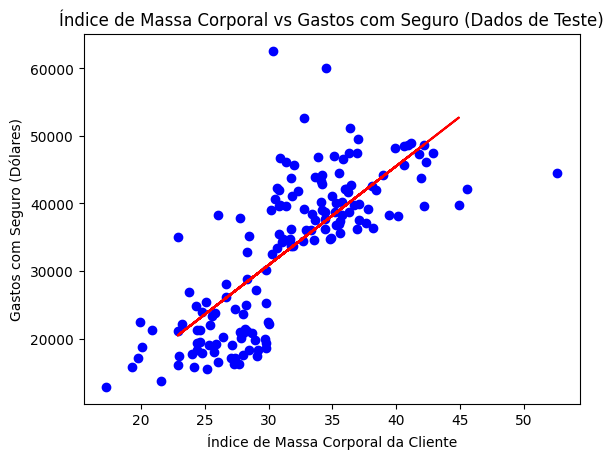

In [ ]:
#16 ANÁLISE GRÁFICA - Dados Experimentais x Modelo
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title("Índice de Massa Corporal vs Gastos com Seguro (Dados de Teste)")
plt.xlabel("Índice de Massa Corporal da Cliente")
plt.ylabel("Gastos com Seguro (Dólares)")

In [ ]:
#17 CÁLCULO DO R2 (AJUSTE LINEAR)
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}')

Coeficiente r2: 0.5609649217590932


In [ ]:
#18 DETERMINAÇÃO DO AJUSTE (ERRO MÉDIO)
print('MAE (Erro):', metrics.mean_absolute_error(y_test, pred))

MAE (Erro): 5318.35762204263
